# UCLA Housing Dataset
Retrieved from kaggle.com

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [8]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B_1000', 'LSTAT', 'MEDV']
df = pd.read_csv('housingdata.csv', names=names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B_1000,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [9]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B_1000     0
LSTAT      0
MEDV       0
dtype: int64

## Scale the data and split into training and testing

In [17]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

y = y.reshape(-1, 1)
y = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## Build the regression model

In [34]:
model = Sequential()

model.add(Dense(units=13, input_dim=13))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

## Train and evaluate

In [36]:
model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
13/13 [==============================] - 0s 806us/step - loss: 0.0166 - mse: 0.0166 - mae: 0.0968
Epoch 2/20
13/13 [==============================] - 0s 959us/step - loss: 0.0163 - mse: 0.0163 - mae: 0.0957
Epoch 3/20
13/13 [==============================] - 0s 583us/step - loss: 0.0160 - mse: 0.0160 - mae: 0.0952
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0157 - mse: 0.0157 - mae: 0.0928
Epoch 5/20
13/13 [==============================] - 0s 786us/step - loss: 0.0155 - mse: 0.0155 - mae: 0.0917
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0152 - mse: 0.0152 - mae: 0.0922
Epoch 7/20
13/13 [==============================] - 0s 658us/step - loss: 0.0150 - mse: 0.0150 - mae: 0.0897
Epoch 8/20
13/13 [==============================] - 0s 763us/step - loss: 0.0146 - mse: 0.0146 - mae: 0.0889
Epoch 9/20
13/13 [==============================] - 0s 2ms/step - loss: 0.0145 - mse: 0.0145 - mae: 0.0876
Epoch 10/20
13/13 [======

## Get model predictions and plot the regression

In [37]:
predictions = model.predict(X_test)

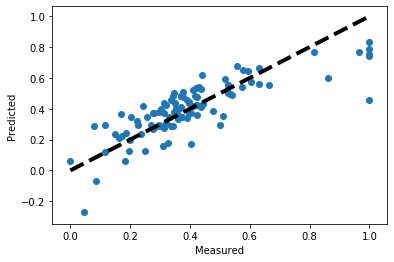

In [39]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.savefig("ucla_lr_01")
plt.show()